In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df1 = pd.read_excel('CMT-all.xlsx', index_col = 0)
df1.index.name = None
list = []
for i in range(len(df1.columns)):
    list.append(np.float64(i+1))

#rename the column names to perform interpolation
df1.columns = list 

#interpolate to fill the NaN values for 20Y/30Y
df1.interpolate(method = 'spline',order = 2, axis =  1, inplace = True) 

#interpolating the 1M values
for i in range(len(df1[1])):
    if pd.isnull(df1[1][i]) == True:
        a = df1[3][i] - df1[2][i]
        b = df1[4][i] - df1[2][i]
        df1[1][i] = df1[2][i] - (a+b)/2

#renaming the dataframe columns back to original name
list1 = ['1M','3M','6M','1Y','2Y','3Y','5Y','7Y','10Y','20Y','30Y']
df1.columns = list1

print("The covariance matrix for the rates is:")
print(df1.cov())

The covariance matrix for the rates is:
           1M        3M        6M        1Y        2Y        3Y        5Y  \
1M   5.277764  5.424829  5.475287  5.417733  5.331988  5.092124  4.576360   
3M   5.424829  5.609648  5.680494  5.641703  5.574827  5.334266  4.806746   
6M   5.475287  5.680494  5.768625  5.741682  5.683824  5.442334  4.906743   
1Y   5.417733  5.641703  5.741682  5.739682  5.712999  5.487649  4.969150   
2Y   5.331988  5.574827  5.683824  5.712999  5.757059  5.570850  5.102656   
3Y   5.092124  5.334266  5.442334  5.487649  5.570850  5.420633  5.008704   
5Y   4.576360  4.806746  4.906743  4.969150  5.102656  5.008704  4.702619   
7Y   4.198406  4.414535  4.505454  4.572601  4.725882  4.661391  4.416172   
10Y  3.760753  3.962259  4.045461  4.116058  4.279169  4.241013  4.057186   
20Y  3.327465  3.510151  3.583202  3.657116  3.826370  3.810872  3.679202   
30Y  2.891405  3.053464  3.114001  3.195099  3.385101  3.403490  3.339282   

           7Y       10Y       20Y  

In [13]:
print("The covariance matrix for the daily returns is:")
print((df1.pct_change(1).cov()))

The covariance matrix for the daily returns is:
           1M        3M        6M        1Y        2Y        3Y        5Y  \
1M   0.077651  0.015889  0.002702  0.001689  0.000590  0.000506  0.000297   
3M   0.015889  0.052853  0.004852  0.001623  0.000799  0.000614  0.000419   
6M   0.002702  0.004852  0.004798  0.000830  0.000588  0.000470  0.000332   
1Y   0.001689  0.001623  0.000830  0.001387  0.000722  0.000602  0.000435   
2Y   0.000590  0.000799  0.000588  0.000722  0.001278  0.000954  0.000707   
3Y   0.000506  0.000614  0.000470  0.000602  0.000954  0.000959  0.000699   
5Y   0.000297  0.000419  0.000332  0.000435  0.000707  0.000699  0.000596   
7Y   0.000205  0.000315  0.000253  0.000336  0.000543  0.000546  0.000478   
10Y  0.000172  0.000240  0.000198  0.000256  0.000407  0.000415  0.000372   
20Y  0.000151  0.000169  0.000143  0.000180  0.000283  0.000292  0.000270   
30Y  0.000141  0.000143  0.000125  0.000153  0.000240  0.000251  0.000237   

           7Y       10Y    

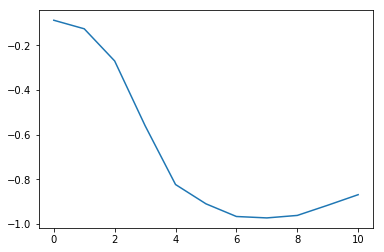

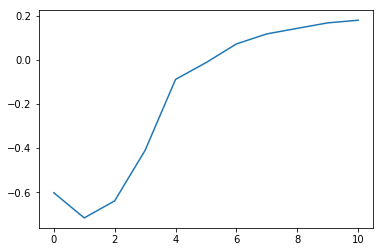

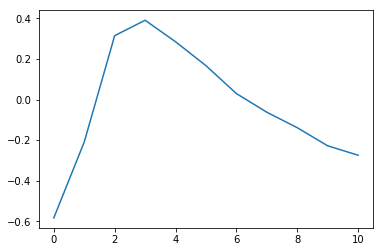

In [20]:
#PCA
A = np.matrix(df1.pct_change(1).corr())
eig_val, eig_vector = np.linalg.eigh(A)
eig_val = np.flip(eig_val, 0)
eig_vector = np.fliplr(eig_vector)
L = np.zeros((11,11))
j = 0
for i in range(11):
    if i == j:
        L[i][j] = math.sqrt(eig_val[i])
        j += 1

S = eig_vector * L
s = pd.DataFrame(S)
plt.plot(s[0])
plt.show()
plt.plot(s[1])
plt.show()
plt.plot(s[2])
plt.show()